### 지도학습 절차

- 지도학습 : 목표변수(Y)와 설명변수(X)의 관계를 학습해서, 새로운 X가 들어올 때, Y를 예측 / 분류

- 지도학습의 절차 6단계:
  1. 데이터 핸들링 (데이터 불러오기 / 파생변수 생성 / 층별화) : 데이터 구조적인 관점에서 학습을 수행할 수 있는 데이터셋을 구성하는 과정

  2. 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정
    - 유의사항 : 사용되는 X는 새로 들어올 데이터에 대한 값으로 지정 ex. 신규고객 이탈 예측을 할 때 구매횟수와 방문횟수를 넣으면 안 됨.

  3. 학습 데이터(Train Set)와 검증 데이터(Test Set)분할
    - 검증 데이터(Test Set)는 학습에 참여하지 않는다! (교차검증에서 Validation Set과는 다른 개념)

  4. 학습을 수행 (Modeling)
    - 특성공학 (결측값 처리 / Encoding / Scaling ...) -> Pipe Line을 이용해서
    - 학습 (알고리즘)

  5. 학습된 모델 평가
    - 학습 능력 평가
    - 일반화 능력 평가


In [15]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt     
plt.rc('font', family='Malgun Gothic')  
!pip install koreanize-matplotlib   
import koreanize_matplotlib        
from IPython.display import display

Defaulting to user installation because normal site-packages is not writeable


- 사용한 데이터 (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [16]:
# 데이터 불러오기
df1 = pd.read_csv("C:/Users/user/OneDrive/바탕 화면/비어플/BAF-Fresh-Edu-18/2주차/diabetes.csv")
print(df1.shape)
print(df1.info())
print(df1.head())
print(df1.tail())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2         

In [17]:
# 환자의 건강 관련 정보를 입력했을 때, 당뇨병에 걸릴지 말지에 대한 판별 모델 생성
# 1) 데이터 핸들링
df1['Outcome'].unique()

array([1, 0])

## **결측치는 없지만 0이 나올 수 있는 변수와 아닌 변수를 구분해서 EDA 할 것**

## **Pregrance**
 - 임신횟수

In [18]:
# 셀 추가해서 EDA 하기

In [19]:
df1["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [20]:
df1["Pregnancies"].value_counts(normalize=True)

Pregnancies
1     0.175781
0     0.144531
2     0.134115
3     0.097656
4     0.088542
5     0.074219
6     0.065104
7     0.058594
8     0.049479
9     0.036458
10    0.031250
11    0.014323
13    0.013021
12    0.011719
14    0.002604
15    0.001302
17    0.001302
Name: proportion, dtype: float64

<Axes: title={'center': 'Pregnancies'}, xlabel='Pregnancies'>

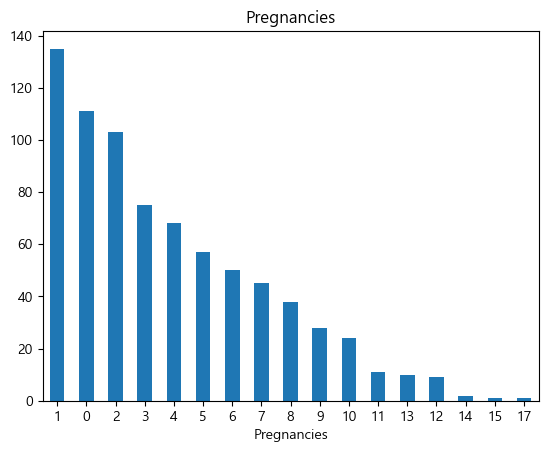

In [21]:
df1["Pregnancies"].value_counts().plot(kind="bar",rot=0,title="Pregnancies")

### **변수 인사이트 정리**

Pregnancies 변수는 총 17개의 고유값들로 이루어져 있다. 또한 고유값들의 비율을 확인했을 때, 1부터 17까지 전반적으로 내림차순으로 정렬이 되는 걸 알 수 있다. 박스플롯을 이용해 시각적으로 보아도 대략 그래프가 임신횟수가 증가할 때 우하향하는 모습을 볼 수 있다.

## **glucose**
- 혈장 포도당 농도
- 사람 혈당이 0일 수는 없다.
- 당뇨는 혈당이 지속적으로 높은 증상

In [ ]:
# 셀 추가해서 EDA 하기

<Axes: ylabel='Glucose'>

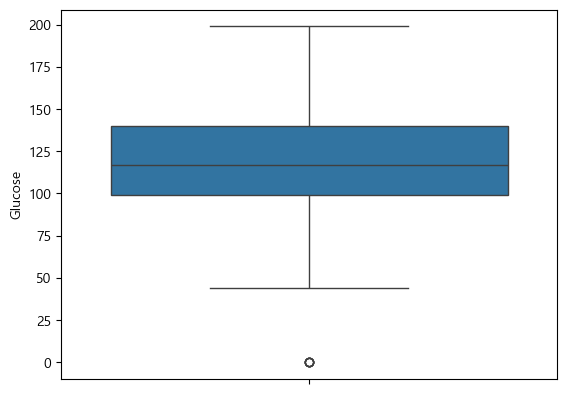

In [31]:
sns.boxplot(df1["Glucose"])

In [32]:
#Glucose 변수의 값이 0인 행 개수
(df1["Glucose"]==0).sum()

np.int64(5)

In [33]:
#실제 사람인지 아닌지 조사하기 위해 검증(나이가 0인 경우는 없음)
df1["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [34]:
##원본 데이터 보존 후 0값을 NaN으로 변환
df1_Glu_mean=df1.copy()
df1_Glu_mean["Glucose"]=df1_Glu_mean["Glucose"].replace(0,np.nan)

In [35]:
##Glucose 평균 확인
df1_Glu_mean["Glucose"].mean()

np.float64(121.6867627785059)

In [36]:
##평균으로 대체
df1_Glu_mean["Glucose"]=df1_Glu_mean["Glucose"].fillna(df1_Glu_mean["Glucose"].mean())

In [37]:
##결과 확인(0값 유무)
(df1_Glu_mean["Glucose"]==0).sum()

np.int64(0)

In [38]:
##결과 확인(NaN값 유무)
(df1_Glu_mean["Glucose"]).isna().sum()

np.int64(0)

### **변수 인사이트 정리**

Glucose 변수에서 0값이 존재하는 행이 5개인 것을 알 수 있다. 이에 0값이 존재하는 행을 제거할까 생각하다가 나이 변수를 확인했을 때, 0값이 존재하는 행도 사람이라는 것을 볼 수 있다. 이에 0값이 나타나는 이유를 데이터가 누락되었다는 것으로 판단하였고, 가장 편리하고 간단한 방법으로 0값을 평균값으로 대체하는 방식을 이용했다. 평균값으로 대체한 이유는 이상치가 확연하게 나타나지 않기 때문이다.

## **bloodpressure**
- 혈압
- 혈압도 0일 수는 없다 

In [24]:
# 셀 추가해서 EDA 하기

<Axes: ylabel='BloodPressure'>

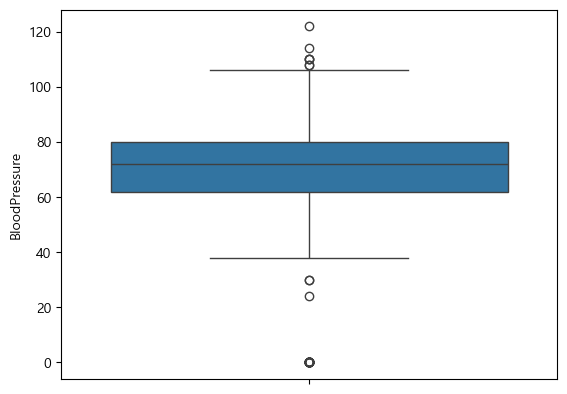

In [25]:
sns.boxplot(df1["BloodPressure"])

In [26]:
(df1["BloodPressure"]==0).sum()

np.int64(35)

In [27]:
##원본 데이터 보존 후 0값을 NaN으로 변환
df1_BP_mean=df1.copy()
df1_BP_mean["BloodPressure"]=df1_BP_mean["BloodPressure"].replace(0,np.nan)

In [28]:
##BloodPressure 평균 확인
df1_BP_mean["BloodPressure"].mean()

np.float64(72.40518417462484)

In [29]:
##평균으로 대체
df1_BP_mean["BloodPressure"]=df1_BP_mean["BloodPressure"].fillna(df1_BP_mean["BloodPressure"].mean())

In [30]:
##결과 확인(0값 유무)
(df1_BP_mean["BloodPressure"]==0).sum()

np.int64(0)

In [ ]:
##결과 확인(NaN값 유무)
(df1_BP_mean["BloodPressure"]).isna().sum()

### **변수 인사이트 정리**

앞선 Glucose 변수와 마찬가지로 BloodPressure 변수는 0이 될 수 없다. BP 변수를 확인했을 때, 0이 나타나는 행이 35개로 이를 평균값으로 대체하는 방식을 채택했다.  

## **SkinThickness**
- 삼두근 피부 두께
- 체지방이란 관련이 있다.
- 0일 수 없다

In [ ]:
# 셀 추가해서 EDA 하기

In [39]:
df1["SkinThickness"].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

<Axes: ylabel='SkinThickness'>

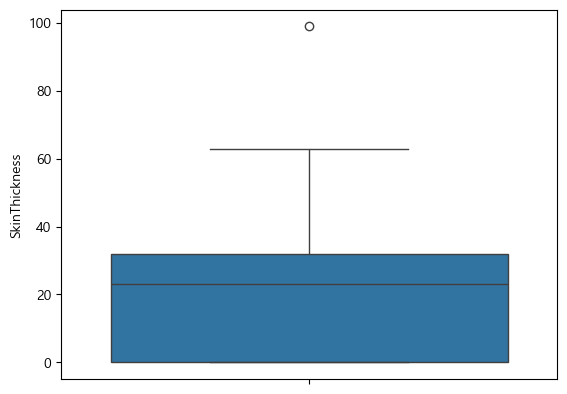

In [40]:
sns.boxplot(df1["SkinThickness"])

In [41]:
(df1["SkinThickness"]==0).sum()

np.int64(227)

In [42]:
##원본 데이터 보존 후 0값을 NaN으로 변환
df1_ST_median=df1.copy()
df1_ST_median["SkinThickness"]=df1_ST_median["SkinThickness"].replace(0,np.nan)

In [43]:
##SkinThickness 중앙값 확인
df1_ST_median["SkinThickness"].median()

29.0

In [44]:
##중앙값으로 대체
df1_ST_median["SkinThickness"]=df1_ST_median["SkinThickness"].fillna(df1_ST_median["SkinThickness"].median())

In [45]:
##결과 확인(0값 유무)
(df1_ST_median["SkinThickness"]==0).sum()

np.int64(0)

In [46]:
##결과 확인(NaN값 유무)
(df1_ST_median["SkinThickness"]).isna().sum()

np.int64(0)

<Axes: ylabel='SkinThickness'>

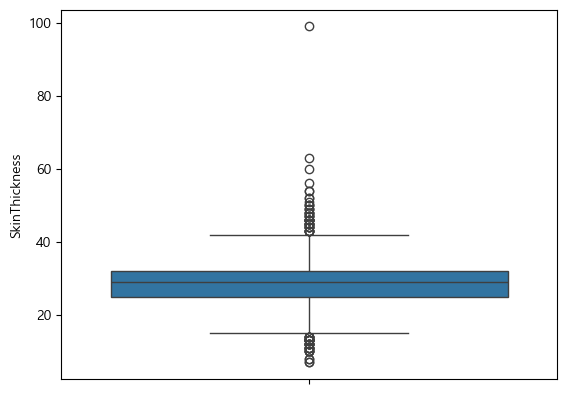

In [47]:
sns.boxplot(df1_ST_median["SkinThickness"])

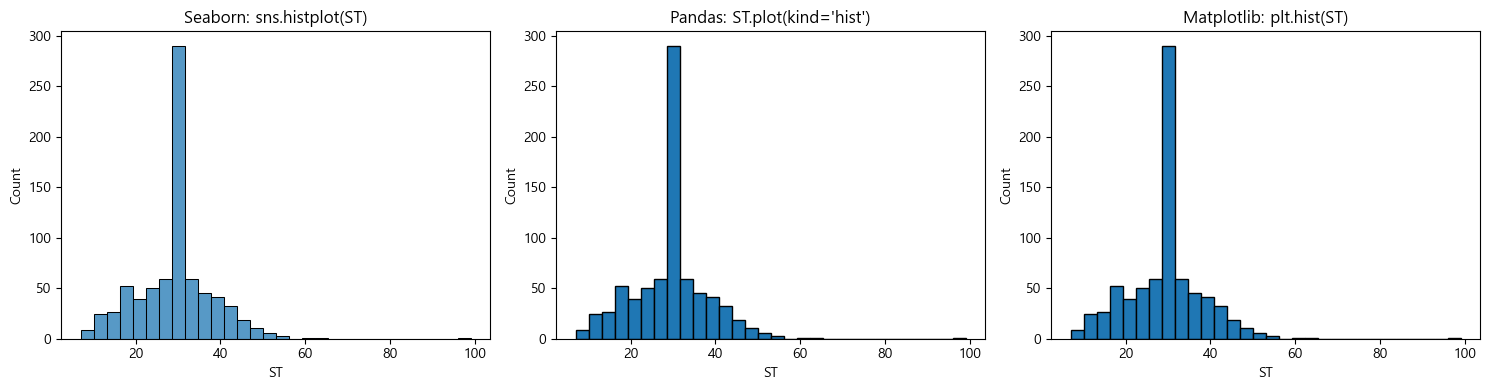

In [48]:
ST = df1_ST_median["SkinThickness"]
bins = 30

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1) seaborn
sns.histplot(ST, bins=bins, ax=axes[0])
axes[0].set_title("Seaborn: sns.histplot(ST)")
axes[0].set_xlabel("ST")
axes[0].set_ylabel("Count")

# 2) pandas .plot
ST.plot(kind="hist", bins=bins, edgecolor="black", ax=axes[1])
axes[1].set_title("Pandas: ST.plot(kind='hist')")
axes[1].set_xlabel("ST")
axes[1].set_ylabel("Count")

# 3) matplotlib
axes[2].hist(ST, bins=bins, edgecolor="black")
axes[2].set_title("Matplotlib: plt.hist(ST)")
axes[2].set_xlabel("ST")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

### **변수 인사이트 정리**

SkinThickness 변수는 앞선 변수와 달리 이상치가 확연하게 있고 0값이 나타나면 안되는데 확인해본 결과 총 227개의 0값이 보인다. 이에 boxplot 개형이 0쪽으로 많이 치우쳐져 있는 것을 볼 수 있다. 따라서 앞선 0값을 평균값으로 대체하는 것보다는 이상치의 영향을 거의 받지 않고 분포 왜곡이 거의 없는 중앙값으로 대체하는 방식을 채택했다. 

## **Insulin**
- 인슐린 분비량
- 당뇨병 유형은 인슐린이 선천적으로 나오지 않는 사람(1형)과 인슐린이 나오지만 인식을 못하는 사람(2형) 당뇨병 두가지가 있다.  

In [ ]:
# 셀 추가해서 EDA 하기

In [49]:
df1["Insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

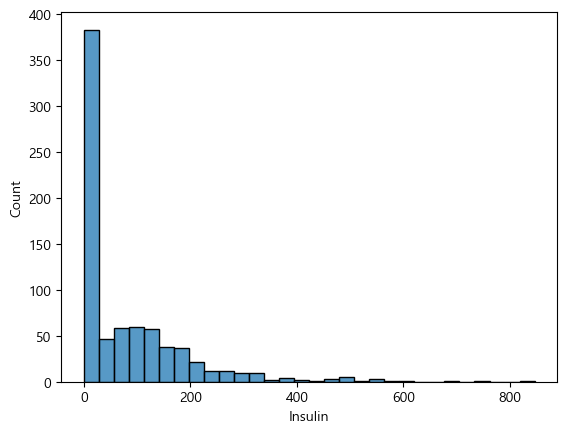

In [50]:
sns.histplot(df1["Insulin"],bins=30)
plt.show()

In [51]:
(df1["Insulin"]==0).sum()

np.int64(374)

In [52]:
##원본 데이터 보존 후 0값을 NaN으로 변환
df1_I_median=df1.copy()
df1_I_median["Insulin"]=df1_I_median["Insulin"].replace(0,np.nan)

In [53]:
##Insulin 중앙값 확인
df1_I_median["Insulin"].median()

125.0

In [54]:
##중앙값으로 대체
df1_I_median["Insulin"]=df1_I_median["Insulin"].fillna(df1_I_median["Insulin"].median())

In [55]:
##결과 확인(0값 유무)
(df1_I_median["Insulin"]==0).sum()

np.int64(0)

In [56]:
##결과 확인(NaN값 유무)
(df1_I_median["Insulin"]).isna().sum()

np.int64(0)

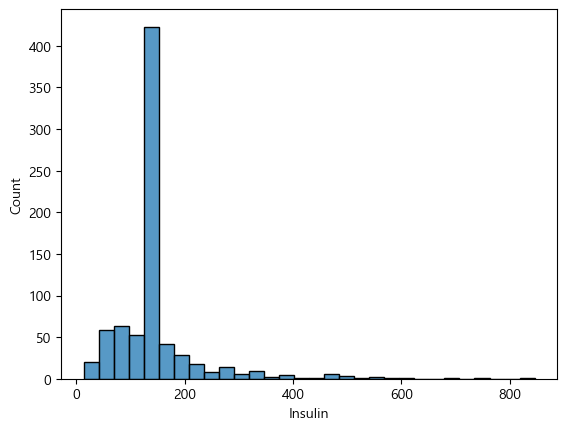

In [57]:
sns.histplot(df1_I_median["Insulin"],bins=30)
plt.show()

### **변수 인사이트 정리**


Insulin 변수는 앞선 SkinThickness 변수와 마찬가지로 의학적으로 0값이 존재할 수 없다. 근데 0값이 나타나는 행이 총 374개로 많다. 평균값으로 대체를 하면 한쪽으로 치우치는 경향이 나타나므로 중앙값으로 대체하는 방식을 채택했다.

## **BMI**
- 0이 나올 수 없는 값

In [ ]:
# 셀 추가해서  EDA 하기

In [58]:
df1["BMI"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

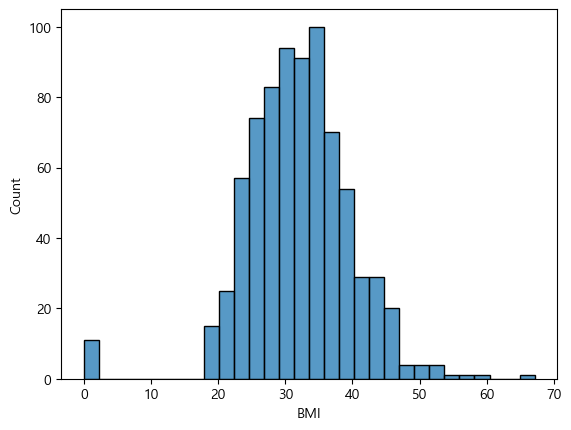

In [59]:
sns.histplot(df1["BMI"],bins=30)
plt.show()

In [60]:
#groupby를 이용해 Outcome별 BMI 값 확인
df1.groupby("Outcome")["BMI"].mean()

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

In [61]:
(df1["BMI"]==0).sum()

np.int64(11)

In [62]:
##원본 데이터 보존 후 0값을 NaN으로 변환
df1_BMI_median=df1.copy()
df1_BMI_median["BMI"]=df1_BMI_median["BMI"].replace(0,np.nan)

In [63]:
##BMI 중앙값 확인
df1_BMI_median["BMI"].median()

32.3

In [64]:
##중앙값으로 대체
df1_BMI_median["BMI"]=df1_BMI_median["BMI"].fillna(df1_BMI_median["BMI"].median())

In [65]:
##결과 확인(0값 유무)
(df1_BMI_median["BMI"]==0).sum()

np.int64(0)

In [66]:
##결과 확인(NaN값 유무)
(df1_BMI_median["BMI"]).isna().sum()

np.int64(0)

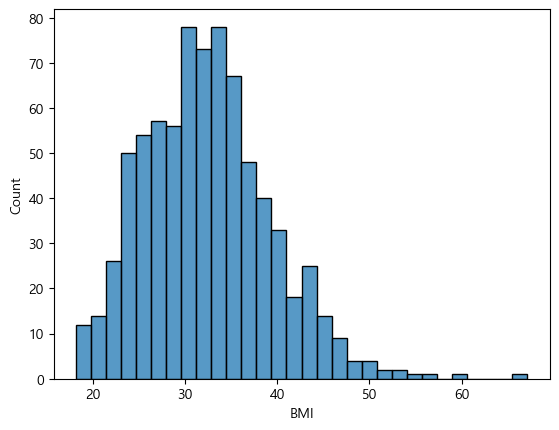

In [67]:
sns.histplot(df1_BMI_median["BMI"],bins=30)
plt.show()

### **변수 인사이트 정리**

BMI 변수 역시 0값이 나타나면 안되므로 중앙값으로 대체하였고, Outcome별 BMI값이 의미가 있을 것 같아 해보았는데 예상했던대로 BMI 값이 높을수록 당뇨가 나타나는 것을 확인할 수 있었다.

## **파생변수 생성 및 추가 전처리**

In [ ]:
# 셀 추가해서 하기

In [68]:
#BMI 범주화하기(서울시민 건강포털 참조)
df1_BMI_median["BMI_category"] = pd.cut(df1_BMI_median["BMI"], bins=[0, 18.5, 23, 35, 100],
labels=["Underweight", "Normal", "Overweight", "Obese"])

In [69]:
df1_BMI_median.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_category
0,6,148,72,35,0,33.6,0.627,50,1,Overweight
1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Overweight
3,1,89,66,23,94,28.1,0.167,21,0,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Obese
5,5,116,74,0,0,25.6,0.201,30,0,Overweight


In [75]:
df1_final=df1[['Pregnancies', 'DiabetesPedigreeFunction', 'Age','Outcome']].copy()
df1_final=df1_final.join(df1_Glu_mean[["Glucose"]]).join(df1_BP_mean[["BloodPressure"]]).join(df1_ST_median[["SkinThickness"]]).join(df1_I_median[["Insulin"]]).join(df1_BMI_median[["BMI","BMI_category"]])
df1_final.describe(include="all")

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,BMI_category
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Overweight
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472
mean,3.845052,0.471876,33.240885,0.348958,121.686763,72.405184,29.108073,140.671875,32.455208,NaN
std,3.369578,0.331329,11.760232,0.476951,30.435949,12.096346,8.791221,86.383060,6.875177,NaN
min,0.000000,0.078000,21.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,NaN
25%,1.000000,0.243750,24.000000,0.000000,99.750000,64.000000,25.000000,121.500000,27.500000,NaN
50%,3.000000,0.372500,29.000000,0.000000,117.000000,72.202592,29.000000,125.000000,32.300000,NaN
75%,6.000000,0.626250,41.000000,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,NaN


In [76]:
df1_final.head(10)

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,BMI_category
0,6,0.627,50,1,148.0,72.000000,35.0,125.0,33.6,Overweight
1,1,0.351,31,0,85.0,66.000000,29.0,125.0,26.6,Overweight
2,8,0.672,32,1,183.0,64.000000,29.0,125.0,23.3,Overweight
3,1,0.167,21,0,89.0,66.000000,23.0,94.0,28.1,Overweight
4,0,2.288,33,1,137.0,40.000000,35.0,168.0,43.1,Obese
5,5,0.201,30,0,116.0,74.000000,29.0,125.0,25.6,Overweight
6,3,0.248,26,1,78.0,50.000000,32.0,88.0,31.0,Overweight
7,10,0.134,29,0,115.0,72.405184,29.0,125.0,35.3,Obese
8,2,0.158,53,1,197.0,70.000000,45.0,543.0,30.5,Overweight
9,8,0.232,54,1,125.0,96.000000,29.0,125.0,32.3,Overweight


In [77]:
col_order = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','BMI_category','DiabetesPedigreeFunction','Age','Outcome']
df1_final = df1_final[col_order]

In [78]:
df1_final.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,BMI_category,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,Overweight,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,Overweight,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,Overweight,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,Overweight,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,Obese,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,Overweight,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,Overweight,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,Obese,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,Overweight,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,Overweight,0.232,54,1


In [79]:
df1_final["BMI_Glucose"]=df1_final["Glucose"]*df1_final["BMI"]

In [80]:
col_order1 = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','BMI_category','BMI_Glucose','DiabetesPedigreeFunction','Age','Outcome']
df1_final = df1_final[col_order1]

In [81]:
df1_final.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,BMI_category,BMI_Glucose,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,Overweight,4972.8,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,Overweight,2261.0,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,Overweight,4263.9,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,Overweight,2500.9,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,Obese,5904.7,2.288,33,1


서울시민건강포털을 참조하여 신체질량지수(BMI)에 따른 비만 진단을 하였다. BMI는 숫자보다는 비만 정도의 단계로 나타내는 것이 유의미하다고 판단하여 BMI_category라는 파생변수를 생성하였다.
또한 비만 + 고혈당 조합이 핵심 리스크이므로 BMI_Glucose라는 파생변수를 생성하였다.(챗GPT 활용)

# **모델링하기**

In [82]:
# 2) 목표변수 / 설명변수 설정
# 파생 변수는 추가하고, 필요 없는 변수는 빼기
X = df1_final[['Glucose', 'BMI', 'BMI_Glucose', 'DiabetesPedigreeFunction', 'Age',]]
Y = df1_final['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [83]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [84]:
train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리됨

[     Glucose   BMI  BMI_Glucose  DiabetesPedigreeFunction  Age
 712    129.0  41.2       5314.8                     0.441   38
 127    118.0  33.3       3929.4                     0.261   23
 73     129.0  35.1       4527.9                     0.231   23
 704    110.0  28.4       3124.0                     0.118   27
 366    124.0  27.6       3422.4                     0.368   29
 ..       ...   ...          ...                       ...  ...
 198    109.0  34.8       3793.2                     0.905   26
 635    104.0  31.2       3244.8                     0.465   38
 439    107.0  36.8       3937.6                     0.727   31
 417    144.0  38.5       5544.0                     0.554   37
 559     85.0  30.1       2558.5                     0.300   35
 
 [576 rows x 5 columns],
      Glucose   BMI  BMI_Glucose  DiabetesPedigreeFunction  Age
 21      99.0  35.4       3504.6                     0.388   50
 446    100.0  25.3       2530.0                     0.658   28
 585     93.0

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [86]:
X.isnull().sum()

Glucose                     0
BMI                         0
BMI_Glucose                 0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

=> X에도 결측치가 없는 데이터이지만, 추후 새로 들어올 데이터에 결측치가 존재할 수 있음

# **각자 공부한 모델 쓰기**

In [88]:
# 4) RandomForest 학습 수행
from sklearn.ensemble import RandomForestClassifier

In [89]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train) # RandomForest 학습 수행

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [90]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [91]:
Y_train_pred = model.predict(X_train)

In [92]:
Y_test_pred = model.predict(X_test)

In [93]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred))

학습 정확도 :  1.0
검증 정확도 :  0.7083333333333334


### 과적합(Overfitting)

- 과적합 : 학습 데이터에 대해서는 Model이 높은 성능을 나타내지만, 검증데이터에서는 성능이 낮게 나오는 현상
- 해결 : 특성공학을 통해 데이터를 더 깔끔하게 생성

### 특성공학(Feature Engineering)
- **특성공학** : 학습의 목적에 맞게(학습이 잘 수행될 수 있도록) 데이터를 깔끔하게 다듬는 작업
- 대표적 기법 : 
  1. Scaling & Encoding : 숫자 데이터의 스케일을 맞추거나, 문자 데이터를 숫자로 변환하여 학습에 사용
  2. Imputation : 데이터 상에 존재하는 결측값에 대해 다른 값으로 대치 (새로 들어오는 데이터가 결측일 수도 있기 때문에)
  3. Cross Validation (교차검증): 학습데이터를 여러 단계로 나누어 분할하여 학습
  4. Hyper Parameter Tuning : 학습 알고리즘 내 존재하는 수학적 구조나 학습에 발생하는 구조, 함수들을 사용자가 통제
  5. Imbalanced Data Sampling : 목표변수의 비율이 깨져있는 데이터를 맞추어 학습
  6. Feature Selection : 목표변수에 가장 영향이 있는 인자를 사용자가 지정한 만큼 선택해서 학습
  7. PCA : 데이터의 차원을 줄이거나 특성을 재구성하여 학습

- Scikit Learn에서 특성공학 기법과 학습을 동시에 수행할 수 있게 Pipe Line 구성하여 학습을 수행

In [94]:
# 4) 학습 수행
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘(의사결정나무)
from sklearn.preprocessing import StandardScaler #Standard Scaling

In [96]:
# 파이프라인 구조 설계
#스케일링 하고 싶으면 StandardScaler() 사용

model_pipe = make_pipeline(RandomForestClassifier(n_estimators=100, random_state=42))
model_pipe

,steps,"[('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'


In [97]:
from sklearn.model_selection import GridSearchCV

#### **공부한 모델의 하이퍼파라미터**

- 여기에 정리하기
- ex: 하이퍼 파라미터의 종류는 n_estimators, max_depth, min_samples_split, min_samples_leaf 등이 있다.
n_estimators(RandomForest를 구성하는 결정트리의 개수) 값을 키우면  모델의 예측 안정성과 성능은 향상될 수 있지만, 너무 키우면 성능 향상이 미미해진다.
max_depth(각 결정트리의 최대 깊이를 제한하는 파라미터) 값을 키우면 모델이 데이터의 복잡한 패턴을 학습할 수 있지만, 너무 키우면 학습 데이터에 과도하게 맞춰져 과적합이 발생할 수 있다.
min_samples_split(노드를 분할하기 위한 최소 샘플 수) 값을 줄이면 트리가 세밀하게 분기되어 과적합 위험이 증가하며, 키우면 모델이 단순해져 일반화 성능이 좋아질 수 있다.
min_samples_leaf(리프 노드가 가져야 하는 최소 샘플 수) 값을 키우면 노드가 지나치게 세분화되는 것을 방지하여 과적합을 줄이는 효과가 있다.

In [104]:
# 하이퍼파라미터 튜닝 및 교차검증
hyperparam = {"randomforestclassifier__n_estimators": [100, 200, 300],
"randomforestclassifier__max_depth": [None, 10, 20],
"randomforestclassifier__min_samples_split": [2, 5],
"randomforestclassifier__min_samples_leaf": [1, 2]}

grid_model1 = GridSearchCV(model_pipe, param_grid = hyperparam, cv=3,
                          scoring='f1', n_jobs=-1)
grid_model1.fit(X_train, Y_train)
best_model1 = grid_model1.best_estimator_

In [105]:
best_model1

,steps,"[('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'


In [100]:
# 5) 평가
Y_train_pred = best_model1.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model1.predict(X_test) # 검증데이터의 예측값 계산

In [101]:
from sklearn.metrics import classification_report

In [102]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       379
           1       0.96      0.94      0.95       197

    accuracy                           0.97       576
   macro avg       0.97      0.96      0.96       576
weighted avg       0.97      0.97      0.97       576



In [106]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       121
           1       0.64      0.55      0.59        71

    accuracy                           0.72       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.71      0.72      0.71       192



# **성능을 높이기 위한 방안**

1. test 데이터의 정확도가 test 데이터의 정확도보다 많이 낮으면 과적합
2. 하이퍼파라미터 튜닝, 추가적인 전처리(변수 제거) 혹은 파생변수 생성 으로 이를 해결 할 수 있다.  